# Assignment 5(due on 12/20)

## Student:吕嘉杰（12331300），Gtihub：lyujiajie

## 批改人：吴昊天

## 得分：40/40

# Q1

Text(0.5, 0, 'Year')

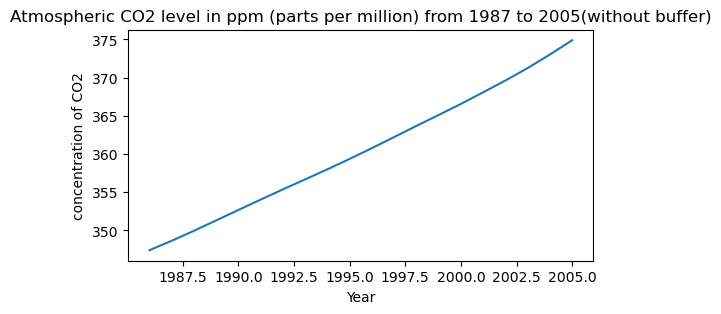

In [ ]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
data =pd.read_csv('global.1751_2014.csv',index_col= ['Year'])
gamma = UnivariateSpline(data.index, data['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'])
gamma.set_smoothing_factor(0.5)
time = np.arange(1986,2006,1)
#define function I got inspiration from Jiang Xiating
def withoutBuffer(N,time,k12,k21,Gamma):
    n1,n2 = N
    gammaTime =Gamma(time)*0.001
    return np.array([ -k12*n1+k21*n2+gammaTime, k12*n1-k21*n2])
#compute the function
CO2withoutBuffer = odeint(withoutBuffer,(740,900),time,args = (105/740,102/900,gamma))[:,0]/2.13
# plot
plt.figure(figsize=(6,3),dpi =100)
plt.plot(time,CO2)
plt.title('Atmospheric CO2 level in ppm (parts per million) from 1987 to 2005(without buffer)')
plt.ylabel('concentration of CO2')
plt.xlabel('Year')

# Q2

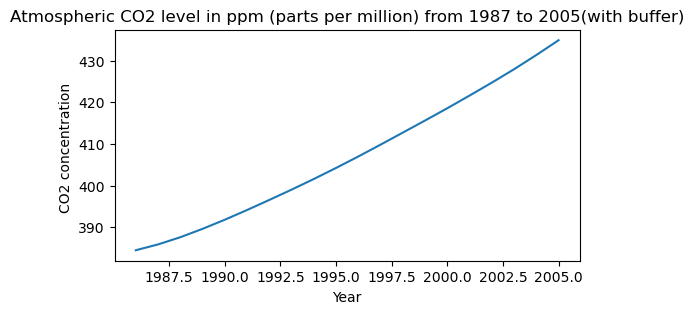

In [ ]:
#define function
def withBuffer(N,timeRange,Parameter):
    n1,n2 = N
    k12,k21,Gamma,sita,n02 = Parameter
    gammaTime =Gamma(timeRange)*0.001
    return np.array([ -k12*n1+k21*(n02+sita*(n2-n02))+gammaTime, k12*n1-k21*(n02+sita*(n2-n02))+gammaTime])
#compute the function
buffer =0.95
k12 = 105/(740+79)
k21 = 102/(900-79)
CO2withBuffer  = odeint(withBuffer,(819,821),time,args = ([k12,k21,gamma,buffer,821],))[:,0]/2.13
# plot the figure
plt.figure(figsize=(6,3),dpi =100)
plt.plot(time,P2)
plt.title('Atmospheric CO2 level in ppm (parts per million) from 1987 to 2005(with buffer)')
plt.ylabel('CO2 concentration ')
plt.xlabel('Year')
plt.show()


# Q3

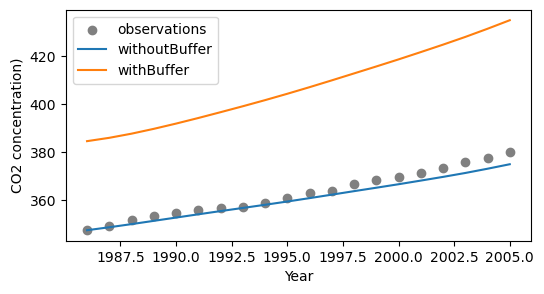

In [ ]:
data =pd.read_csv('co2_annmean_mlo.csv', nrows= 20)
plt.figure(figsize=(6,3),dpi =100)
plt.scatter(data["year"], data["mean"], label ='observations',c="grey")
plt.plot(time,CO2withoutBuffer ,label="withoutBuffer")
plt.plot(time,CO2withBuffer,label="withBuffer" )
plt.ylabel('CO2 concentration)')
plt.xlabel('Year')
plt.legend()